This article is a continuation from :
https://www.alvinang.sg/s/Simple_Linear_Regression_for_TSLA_Stock_Price_Prediction_THE_RIGHT_WAY.ipynb




---



#Step 1: Pip Install, Import Libraries and Dataset

In [1]:
#Import Libraries

!pip install yfinance
import yfinance as yf
import pandas as pd

#Import Data from 2020 to 2021

ticker = 'TSLA'
df = yf.download(\
                 ticker,
                 start = '2020-01-01',
                 end = '2021-12-31')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713045,28.114000,28.684000,28.684000,143375790
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266920455
2020-01-06,29.364666,30.104000,29.333332,30.102667,30.102667,152362485
2020-01-07,30.760000,31.441999,30.223665,31.270666,31.270666,266034045
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467990895
...,...,...,...,...,...,...
2021-12-23,335.600006,357.658905,332.519989,355.666656,355.666656,92713287
2021-12-27,357.890015,372.333344,356.905060,364.646667,364.646667,71145819
2021-12-28,369.829987,372.999969,359.473328,362.823334,362.823334,60323907




---



#Step 2: Visual Inspection of Linear Relationship between Features

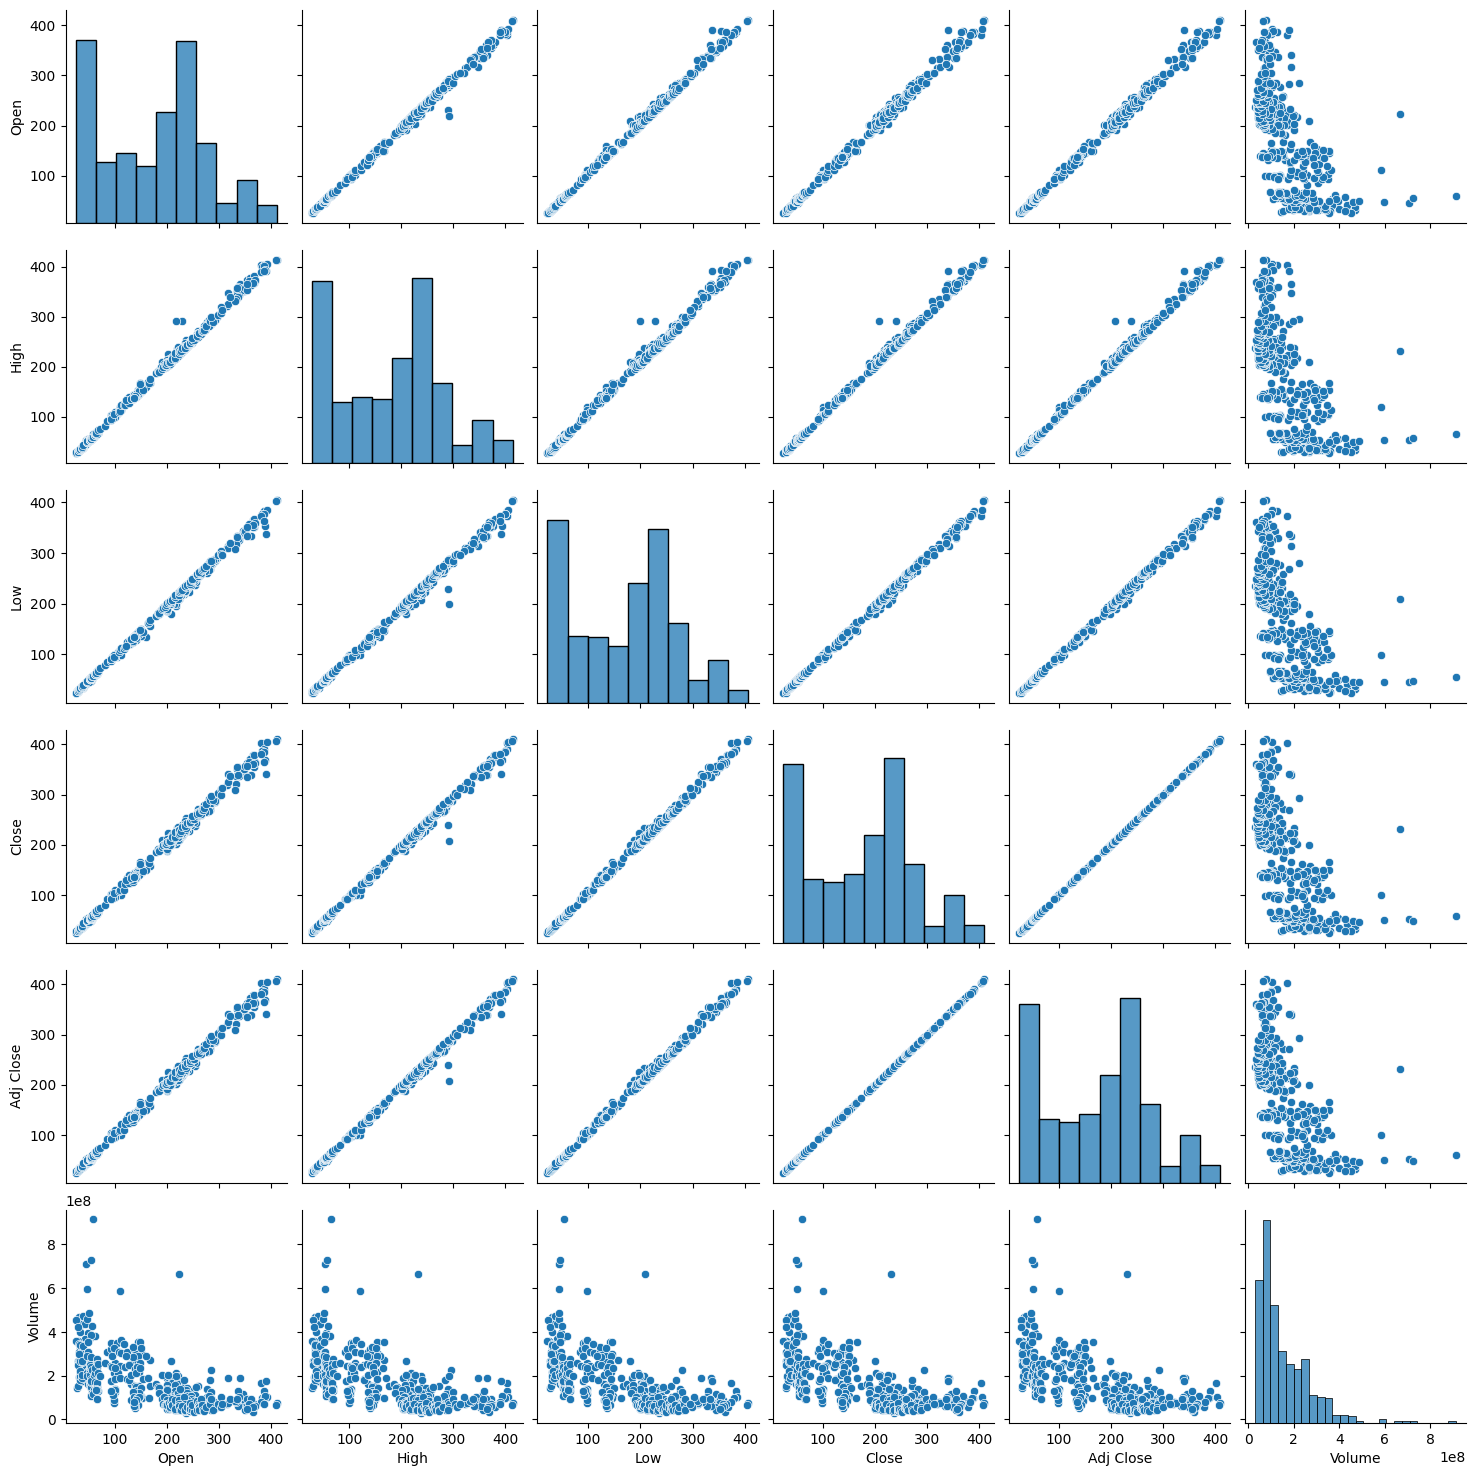

In [2]:
import seaborn as sns

sns.pairplot(df)

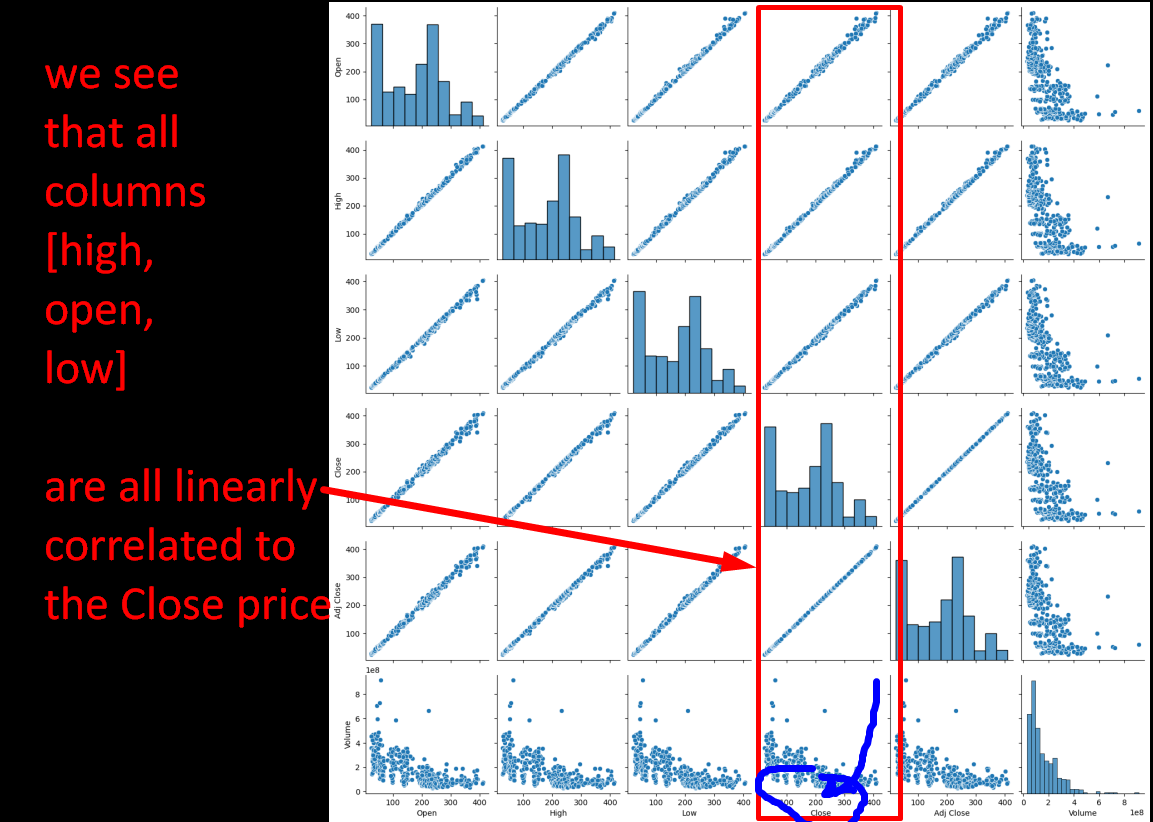



---



#Step 3: Define X and y

In [3]:
#We use yesterday's:
#Open / High / Low price to predict Today's close....

X = df[['Open', 'High', 'Low']].shift(+1)
X = X.dropna()
y = df['Close']

df1 = X.join(y)

X = df1[['Open', 'High', 'Low']]
y = df1['Close']



---



#Step 4: Train Test Split

In [4]:
split = int(0.8*len(X))

X_train, X_test, y_train, y_test = \
X[:split], X[split:], y[:split], y[split:]



---



#Step 5: Fit MR Model

In [5]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions on X test
y_pred = model.predict(X_test)

#Comparing between y_pred vs y_test
comparison = pd.DataFrame({
    'predicted': y_pred.tolist(),
    'actual': y_test.values.tolist()
    })

print(comparison)
#results seems close!

      predicted      actual
0    237.184172  237.919998
1    239.718307  236.663330
2    238.384566  235.940002
3    239.022820  240.750000
4    238.475909  239.056671
..          ...         ...
96   327.824100  355.666656
97   342.764597  364.646667
98   365.273297  362.823334
99   366.182414  362.063324
100  361.176734  356.779999

[101 rows x 2 columns]




---



#Step 6: R2 Score

In [6]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#the MR fit is 95%!
#great fit!

0.9530543598705117



---



#Step 7: Prediction

In [8]:
test = model.predict([[200, 230, 180]])
test

#we test the model by giving a fictitous:
#'open' price of $200
#'high' price of $230
#'low' price of $180
#the result tells us that tomorrow's close price will be predicted to be $192.80

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([192.80979961])



---



#THE END



---

